### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Quantitative and Quantitative Analysis](#quan)**
2. **[Categorical and Quantitative Analysis](#catquan)**
3. **[Categorical and Categorical Analysis](#cat)**

**Import the required libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the adult dataset and check the first five observations

In [8]:
df=pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
# rename the columns
df.rename(columns={'education.num':'education_num','marital.status':'marital_status',
                   'capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week',
                  'native.country':'native_country'},inplace=True)


In [10]:
# replace the values in the columns
df['workclass'] = df['workclass'].replace({'?': 'Private'})
df['occupation']=df['occupation'].replace({'?':'Prof-specialty'})
df['income']=df['income'].replace({'<=50K':'Less than equal to 50K','>50K':'Greater than 50K'})

In [11]:
df['workclass']=df['workclass'].replace({'Self-emp-not-inc':'Self_emp_not_inc',
                                         'Local-gov':'Local_gov','State-gov':'State_gov',
                                        'Self-emp-inc':'Self_emp_inc','Federal-gov':'Federal_gov',
                                        'Without-pay':'Without_pay','Never-worked':'Never_worked'})
df['education']=df['education'].replace({'HS-grad':'HS_grad','Some-college':'Some_college','Assoc-voc':'Assoc_voc','Assoc-acdm':'Assoc_acdm',
                                         '7th-8th':'7th_8th','Prof-school':'Prof_school','5th-6th':'5th_6th','1st-4th':'1st_4th'})
df['marital_status']=df['marital_status'].replace({'Married-civ-spouse':'Married_civ_spouse','Never-married':'Never_married',
                                                   'Married-spouse-absent':'Married_spouse_absent','Married-AF-spouse':'Married_AF_spouse'})
df['occupation']=df['occupation'].replace({'Prof-specialty':'Prof_specialty','Craft-repair':'Craft_repair','Exec-managerial':'Exec_managerial',
                                          'Adm-clerical':'Adm_clerical','Other-service':'Other_service','Machine-op-inspct':'Machine_op_inspct',
                                          'Transport-moving':'Transport_moving','Handlers-cleaners':'Handlers_cleaners',
                                           'Farming-fishing':'Farming_fishing','Tech-support':'Tech_support','Protective-serv':'Protective_serv',
                                           'Priv-house-serv':'Priv_house_serv','Armed-Forces':'Armed_Forces'})
df['relationship']=df['relationship'].replace({'Not-in-family':'Not_in_family','Own-child':'Own_child','Other-relative':'Other_relative'})
df['race']=df['race'].replace({'Asian-Pac-Islander':'Asian_Pac_Islander','Amer-Indian-Eskimo':'Amer_Indian_Eskimo'})
df['native_country']=df['native_country'].replace({'United-States':'United States','Puerto-Rico':'Puerto Rico','El-Salvador':'El Salvador',
                                                   'Dominican-Republic':'Dominican Republic','Trinadad&Tobago':'Trinadad & Tobago',
                                                   'Outlying-US(Guam-USVI-etc)':'Outlying_US(Guam_USVI_etc)','Holand-Netherlands':'Holand_Netherlands'})

<br><br><br>
### Let's begin with some hands-on practice exercises

<a id="quan"> </a>
## 1. Quantitative and Quantitative Analysis

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1.Is there any effect of a person's age on the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: xlabel='age', ylabel='hours_per_week'>

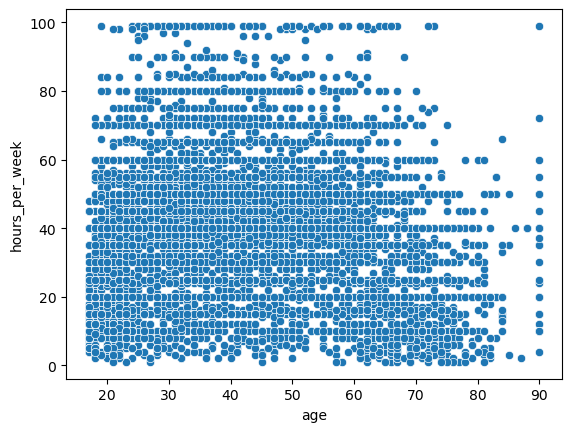

In [12]:
sns.scatterplot(x='age',y='hours_per_week',data=df)

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2.Analyze the trend of the capital gain amount for different educational qualifications</b>
                </font>
            </div>
        </td>
    </tr>
</table>

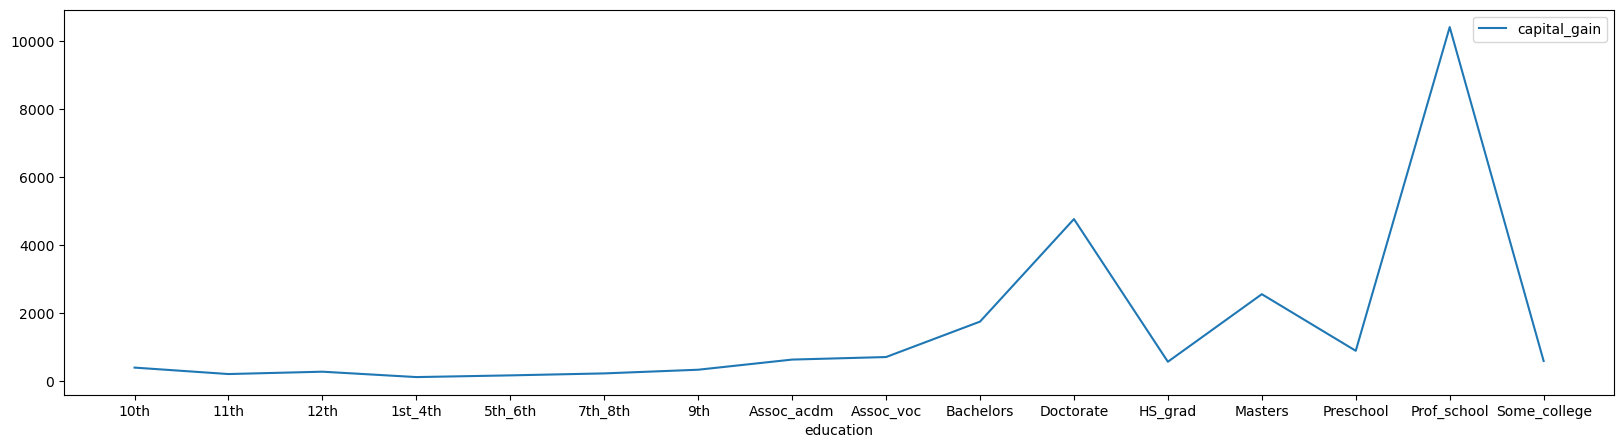

In [15]:
avg_amount=df.groupby(['education'])['capital_gain'].mean()
average=avg_amount.round(2).to_frame()
plt.figure(figsize=(20,5))
ax=sns.lineplot(data=average)

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3.Check the effect of working hours of individuals on capital gain </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: xlabel='hours_per_week', ylabel='capital_gain'>

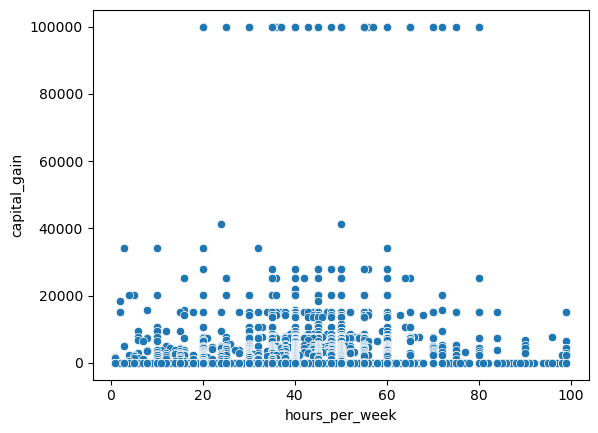

In [16]:
sns.scatterplot(y='capital_gain',x='hours_per_week',data=df)

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
            <b>4.Find the trend in the average working hours corresponding to the age of an individual</b>
                </font>
            </div>
        </td>
    </tr>
</table>

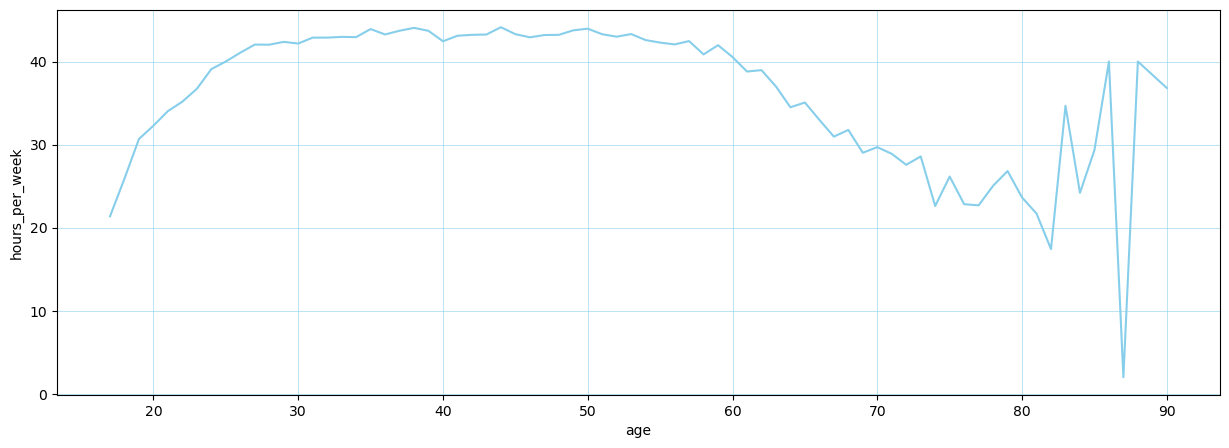

In [85]:
avg_hours=df.groupby(['age'])['hours_per_week'].mean()
avg_hours.to_frame()
plt.figure(figsize=(15,5))
sns.lineplot(avg_hours,color = 'skyblue')

plt.grid(color='skyblue', linestyle='-', linewidth=0.4)

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.Check the distribution of the average capital loss corresponding to the age</b>
                </font>
            </div>
        </td>
    </tr>
</table>

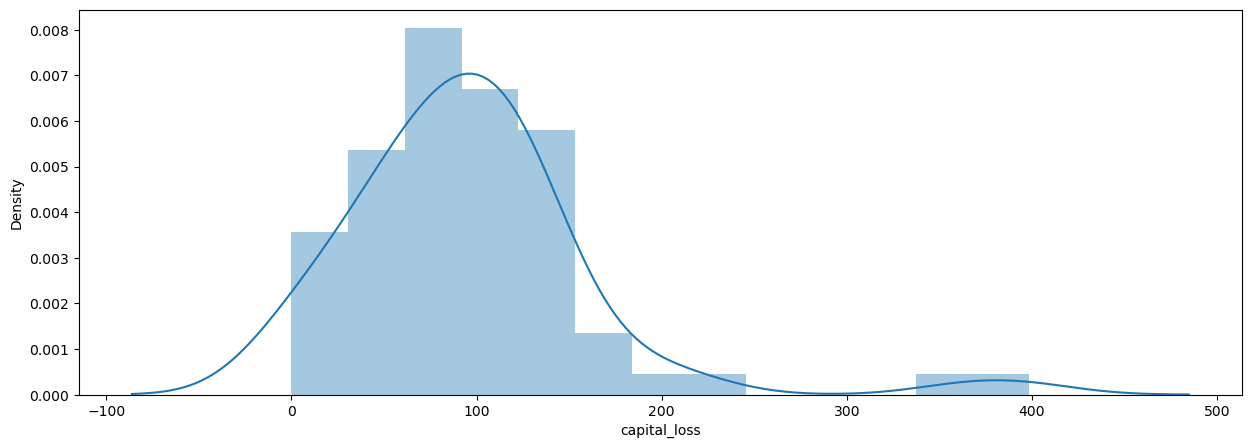

In [28]:
from warnings import filterwarnings
filterwarnings('ignore')

avg = df.groupby('age')['capital_loss'].mean()
avg.round(2)
plt.figure(figsize = (15,5))
sns.distplot(avg)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there a negative relation between capital gain and age?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

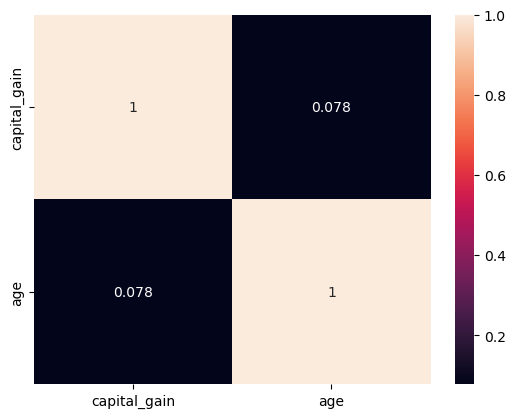

In [39]:
corr=df[['capital_gain','age']].corr()
corr
sns.heatmap(corr,annot=True)
plt.show()

<br><br><br><br>
<a id="catquan"> </a>
## 2. Categorical and Quantitative Analysis

<table align="left">
    <tr>
        <td width="6%">
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Compare the average age with levels of income </b>
                </font>
            </div>
        </td>
    </tr>
</table>

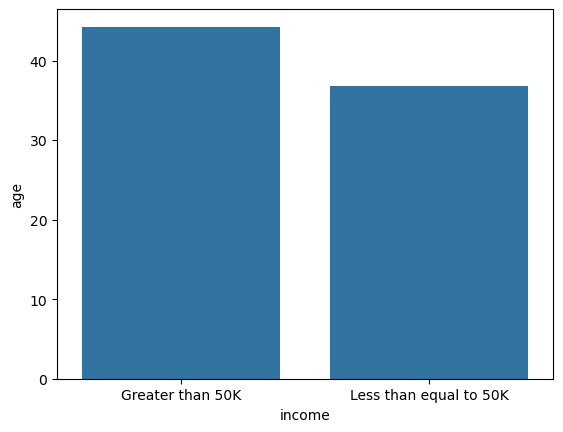

In [38]:
avg_age=df.groupby(['income'])['age'].mean()
avg_age.round(2)
sns.barplot(avg_age)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Check the distribution of working hours with respect to the gender of the individual</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

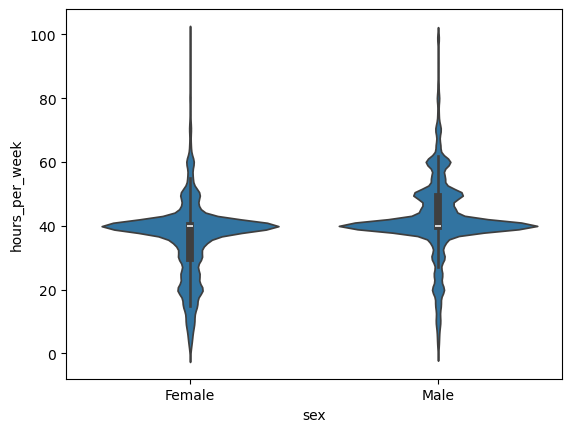

In [36]:
sns.violinplot(x='sex',y='hours_per_week',data=df)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Compare the income of individuals based on their education</b>
                </font>
            </div>
        </td>
    </tr>
</table>

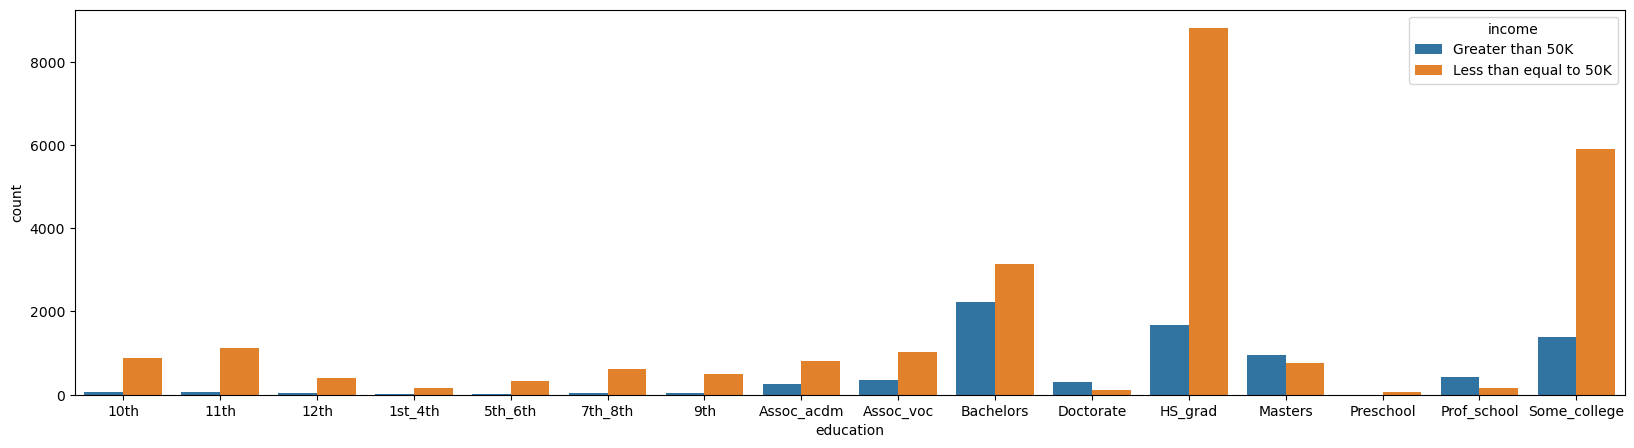

In [40]:
income_by_edu = df.groupby(['education', 'income']).size().reset_index(name='count')
plt.figure(figsize=(20,5))
sns.barplot(data=income_by_edu, x='education', y='count', hue='income')
plt.show()

<Figure size 1500x500 with 0 Axes>

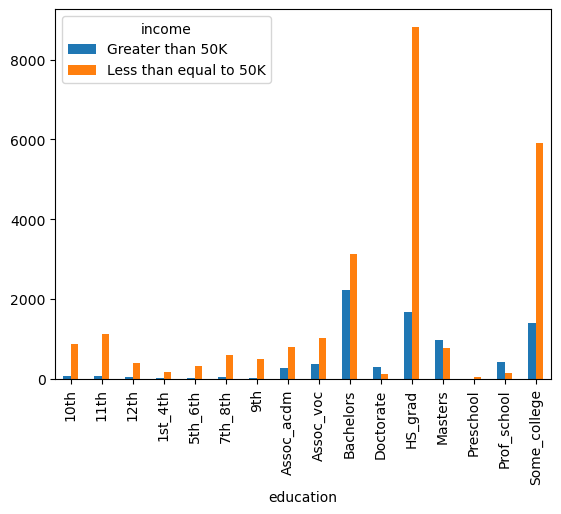

In [41]:
plt.figure(figsize=(15,5))
pd.crosstab(df['education'], df['income']).plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the average age of males and females</b>
                </font>
            </div>
        </td>
    </tr>
</table>

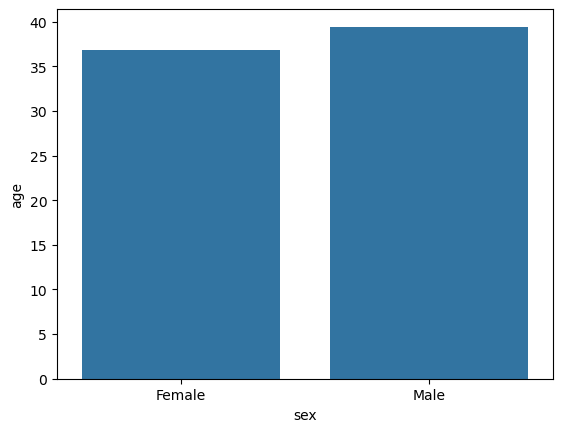

In [45]:
avg_age=df.groupby('sex')['age'].mean()
avg_age
sns.barplot(avg_age)

plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Compare the distribution of working hours for the distinct classes of income
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

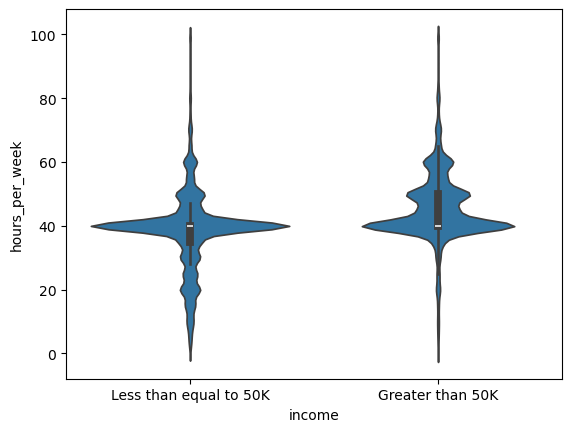

In [47]:
sns.violinplot(x='income',y='hours_per_week',data=df)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Identify the positively skewed distributions of age based on the gender and race of the individual 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

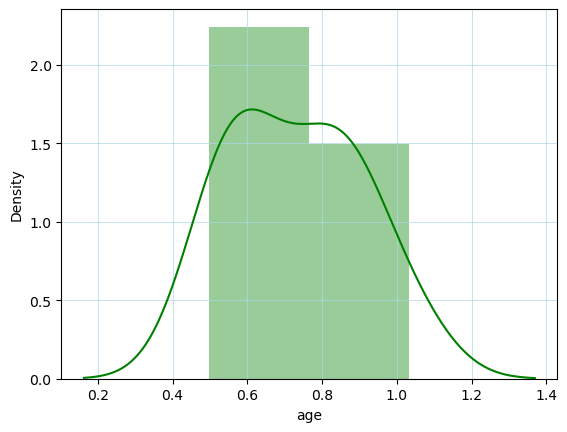

In [77]:
#from warnings import filterwarnings 
# filterwarnings('ignore')


skew=df.groupby(['sex','race'])['age'].skew()
positive_skew = skew[skew > 0]
sns.distplot(positive_skew,color = 'green')

plt.grid(color='lightblue', linestyle='-', linewidth=0.5)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the working hours for each working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

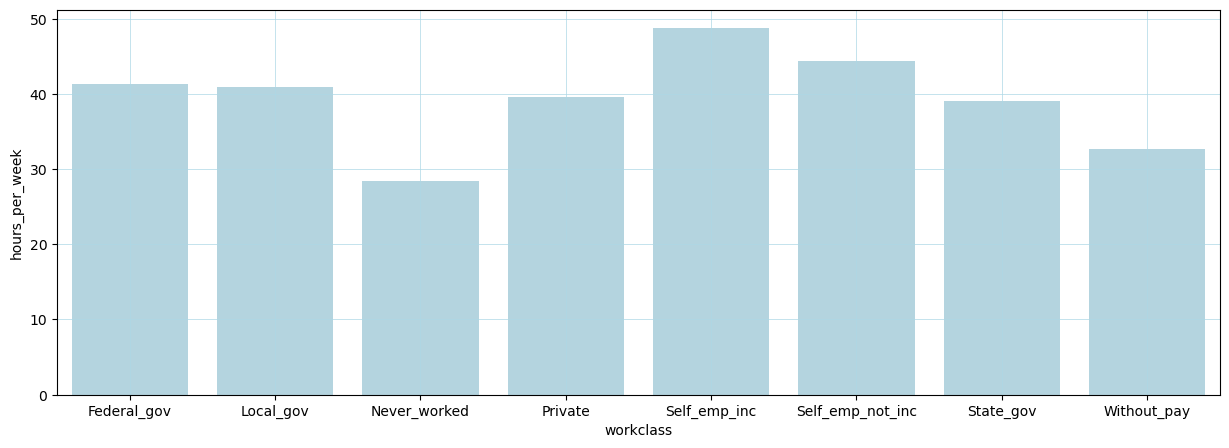

In [67]:
class_hours=df.groupby(['workclass'])['hours_per_week'].mean()
plt.figure(figsize=(15,5))
sns.barplot(class_hours,color = 'lightblue')

plt.grid(color='lightblue', linestyle='-', linewidth=0.5)
plt.show()

In [27]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Compare the weightage based on demographic characteristics by gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

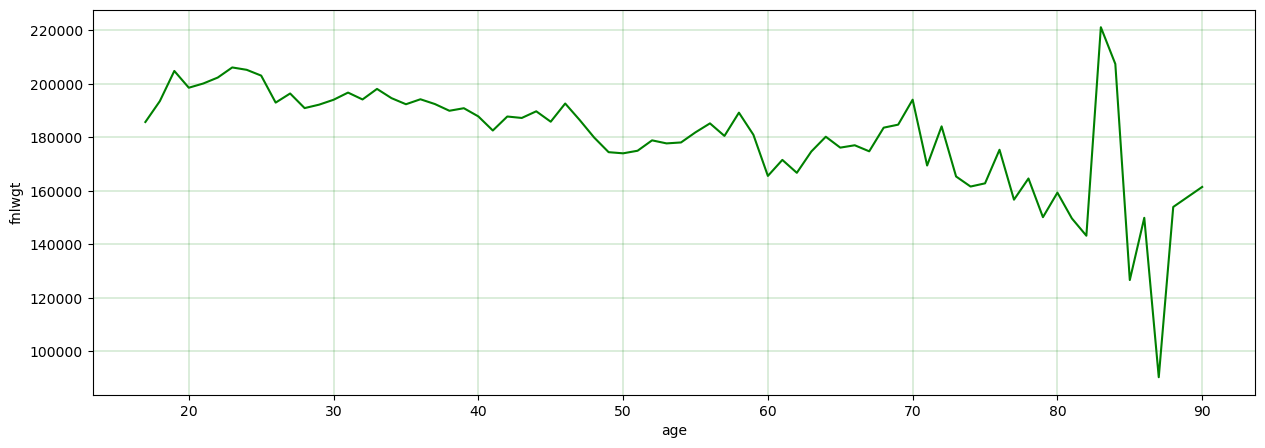

In [73]:
weight_age=df.groupby(['age'])['fnlwgt'].mean()
plt.figure(figsize=(15,5))
sns.lineplot(weight_age,color = 'g')

plt.grid(color='g', linestyle='-', linewidth=0.2)

<br><br><br><br>
<a id="cat"> </a>
## 3. Categorical and Categorical Analysis

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Study the variation in income by gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

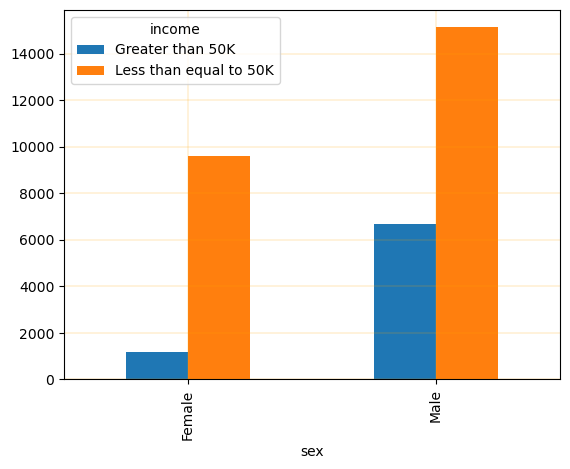

In [98]:
pd.crosstab(df['sex'], df['income']).plot(kind='bar')

plt.grid(color='orange', linestyle='-', linewidth=0.2)

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the income by race</b>
                </font>
            </div>
        </td>
    </tr>
</table>

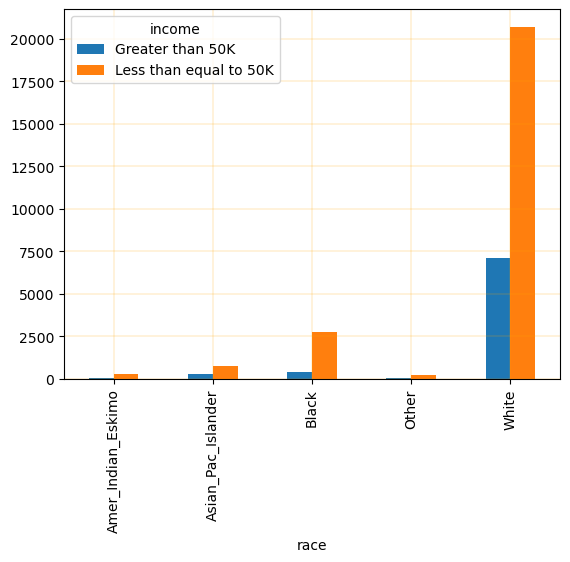

In [121]:
pd.crosstab(df['race'], df['income']).plot(kind='bar')

plt.grid(color='orange', linestyle='-', linewidth=0.2)

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Is there an all male profession according to the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

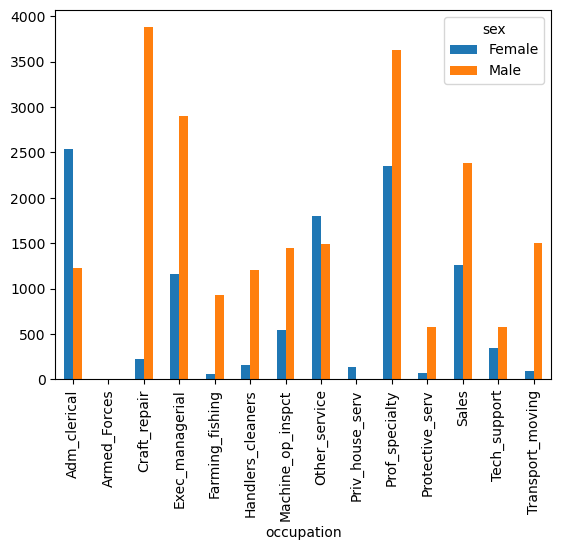

In [127]:
pd.crosstab( df['occupation'],df['sex']).plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. How does income vary with working class?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: xlabel='workclass'>

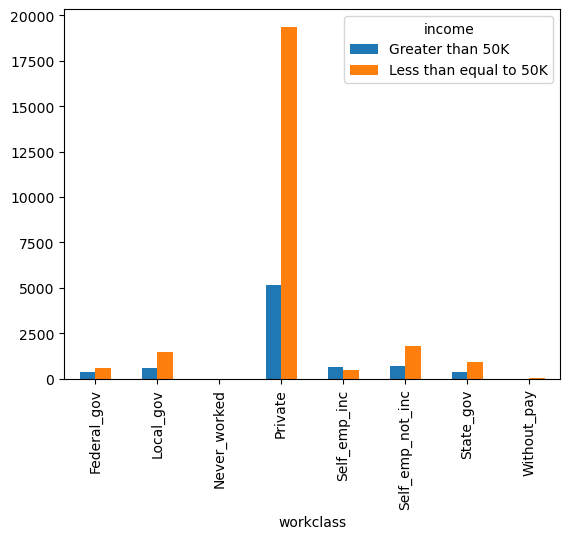

In [128]:
pd.crosstab( df['workclass'],df['income']).plot(kind='bar')

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. How is income related to marital status?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

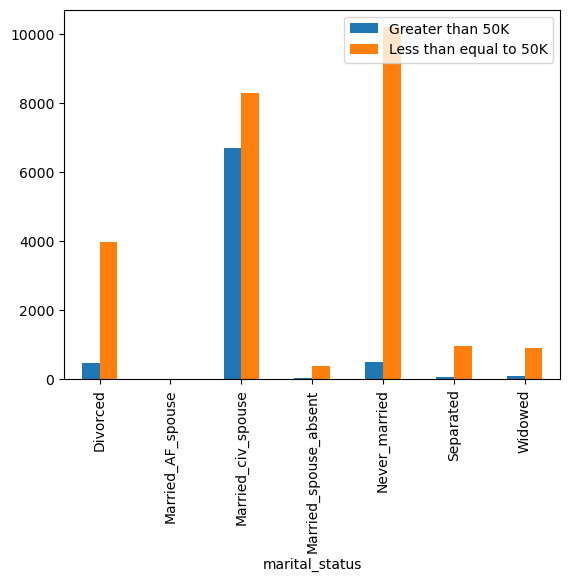

In [131]:
pd.crosstab( df['marital_status'],df['income']).plot(kind='bar')

plt.legend(loc = 'upper right')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Compare the income for different occupations</b>
                </font>
            </div>
        </td>
    </tr>
</table>

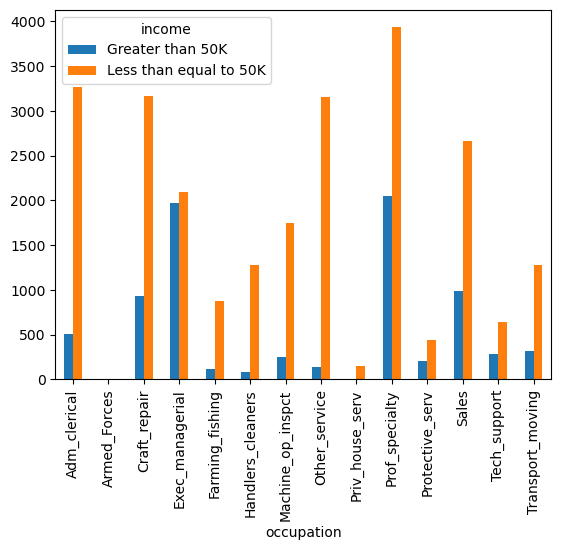

In [133]:
pd.crosstab(df['occupation'],df['income']).plot(kind='bar')
plt.show()